# Notebook including plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import *

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import *

import time

import re
import csv
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import itertools

from joblib import dump, load

nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /Users/tove/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tove/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
logreg = load('LogReg_600k.joblib')
mlp = load('MLP_600K.joblib')
df_600K_cleaned = pd.read_csv('600K_cleaned.csv')

In [4]:
df = df_600K_cleaned
X  = df['content']
y = df['type_binary']

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

print ("x split into train, validation and test sets: ", X_train.shape, X_val.shape, X_test.shape)
print ("y split into train, validation and test sets: ", y_train.shape, y_val.shape, y_test.shape)

x split into train, validation and test sets:  (454688,) (56836,) (56836,)
y split into train, validation and test sets:  (454688,) (56836,) (56836,)


# Simple model: Logistic regression
### On test set from FakeNewsCorpus

In [5]:
predictions = logreg.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

report_dict_LR_fn = classification_report(y_test, predictions, output_dict=True)
report = classification_report(y_test, predictions)
print (report)

True Positive(TP)  =  32089
False Positive(FP) =  4492
True Negative(TN)  =  16634
False Negative(FN) =  3621
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     21126
           1       0.88      0.90      0.89     35710

    accuracy                           0.86     56836
   macro avg       0.85      0.84      0.85     56836
weighted avg       0.86      0.86      0.86     56836



## Roc Curve, Logisitic Regression

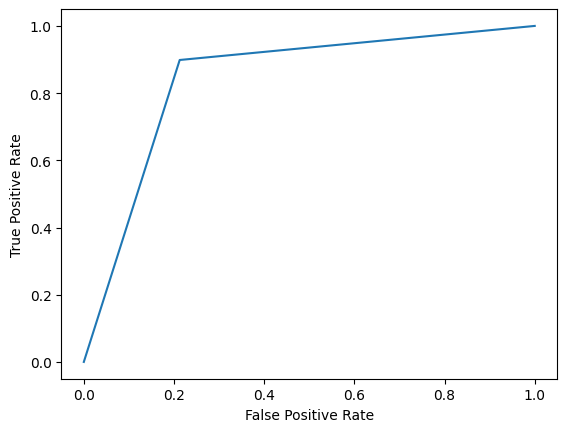

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Confusion matrix, Logisitic regression

/var/folders/zn/swxwxbtx3gzbxgntvpx2cv5c0000gn/T/ipykernel_1695/1817471512.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['True Positive', 'False Positive', 'True Negative', 'False Negative'])


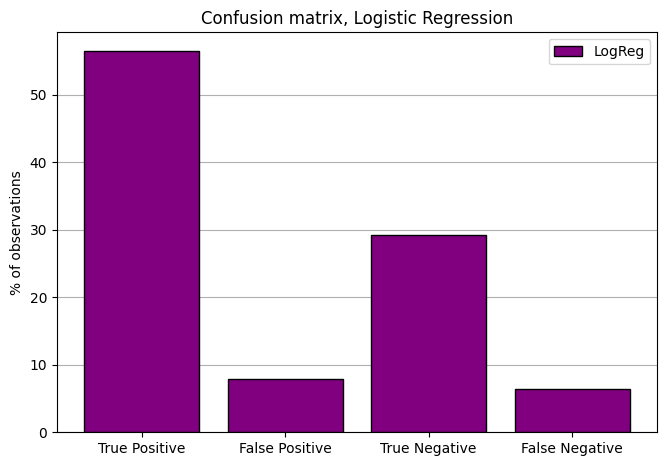

In [7]:
df_LogReg = pd.DataFrame({'lab':['TP', 'FP', 'TN', 'FN'], 'val':[(TP/len(y_test)*100), FP/len(y_test)*100, TN/len(y_test)*100, FN/len(y_test)*100]})

fig_1 = plt.figure(figsize=(6,4))
ax = fig_1.add_axes([0,0,1,1])

ax.bar(df_LogReg['lab'],df_LogReg['val'], edgecolor='black', color='purple',zorder=1)
ax.set_axisbelow(True)
ax.grid(True, axis='y',zorder=0.5)
ax.set_xticklabels(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
ax.set_ylabel('% of observations')
ax.set_title('Confusion matrix, Logistic Regression')
ax.legend(labels=['LogReg'])

In [8]:
fig_1.savefig('1st_plot.png')

# Advanced model: Multi-Layer Perceptron (MLP)
### On test set from FakeNewsCorpus

In [9]:
y_pred_MLP = mlp.predict(X_test)

report_dict_MLP_fn = classification_report(y_test, y_pred_MLP, output_dict=True)
report = classification_report(y_test, y_pred_MLP)
print (report)

TN_MLP, FP_MLP, FN_MLP, TP_MLP = confusion_matrix(y_test, y_pred_MLP).ravel()

print('True Positive(TP)  = ', TP_MLP)
print('False Positive(FP) = ', FP_MLP)
print('True Negative(TN)  = ', TN_MLP)
print('False Negative(FN) = ', FN_MLP)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80     21126
           1       0.89      0.86      0.87     35710

    accuracy                           0.85     56836
   macro avg       0.83      0.84      0.84     56836
weighted avg       0.85      0.85      0.85     56836

True Positive(TP)  =  30603
False Positive(FP) =  3686
True Negative(TN)  =  17440
False Negative(FN) =  5107


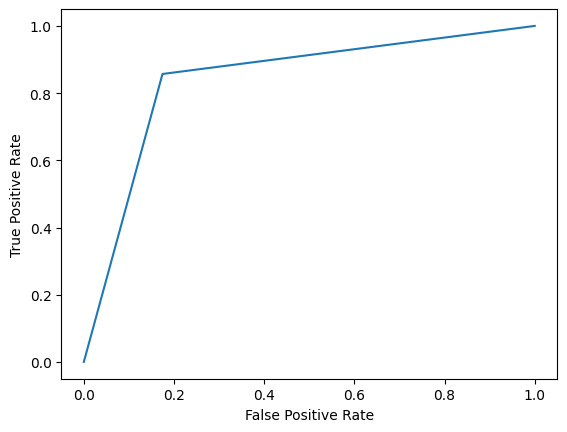

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_pred_MLP)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

/var/folders/zn/swxwxbtx3gzbxgntvpx2cv5c0000gn/T/ipykernel_1695/2643213468.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['True Positive', 'False Positive', 'True Negative', 'False Negative'])


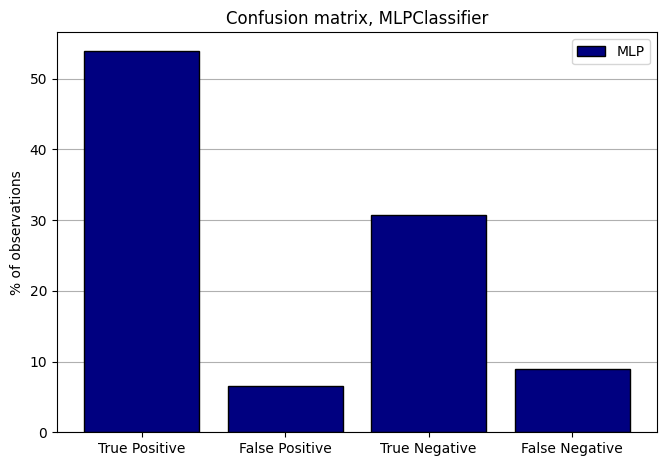

In [11]:
df_MLP = pd.DataFrame({'lab':['TP', 'FP', 'TN', 'FN'], 'val':[TP_MLP, FP_MLP, TN_MLP, FN_MLP]})
df_MLP['val']=df_MLP['val']/len(y_test)*100

fig_2 = plt.figure(figsize=(6,4))
ax = fig_2.add_axes([0,0,1,1])

ax.bar(df_MLP['lab'], df_MLP['val'], color='navy', edgecolor='black',zorder=1)
ax.set_axisbelow(True)
ax.grid(True, axis='y',zorder=0.5)
ax.set_xticklabels(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
ax.set_ylabel('% of observations')
ax.set_title('Confusion matrix, MLPClassifier')
ax.legend(labels=['MLP'])

/var/folders/zn/swxwxbtx3gzbxgntvpx2cv5c0000gn/T/ipykernel_1695/3767244170.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)


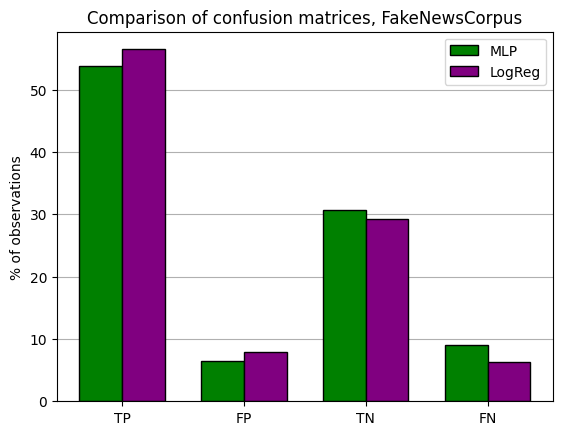

In [38]:
ind = np.arange(len(df_MLP['val']))  # the x locations for the groups
w = 0.35

fig_4, ax = plt.subplots()

show_mlp = ax.bar(ind - w/2, df_MLP['val'], w, label='MLP',zorder=1,color='green',edgecolor='black')
show_logreg = ax.bar(ind + w/2, df_LogReg['val'], w, label='LogReg',zorder=1, color='purple',edgecolor='black')
ax.set_axisbelow(True)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.grid(True, axis='y', zorder=0.5)

ax.set_ylabel('% of observations')
ax.set_title('Comparison of confusion matrices, FakeNewsCorpus')
ax.set_xticks(ind)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.legend()

In [13]:
fig_4.savefig('ConfusionMatrix.png')

# LIAR dataset

Import and preprocessing

In [14]:
# Import LIAR dataset
columns = ['json','type','content','keywords','idk','idk2','state','politics','num1','num2','num3','num4','num5','category']
df_liar_train = pd.read_csv('train.tsv', sep='\t', header=None, names=columns)
df_liar_test = pd.read_csv('test.tsv', sep='\t', header=None, names=columns)
df_liar_val = pd.read_csv('valid.tsv', sep='\t', header=None, names=columns)


In [15]:
# Concat LIAR train, test, and val files into one dataframe
df_LIAR = pd.concat([df_liar_train, df_liar_test, df_liar_val], ignore_index=True)

# Drop unused columns
df_LIAR = df_LIAR.drop(['json','keywords','idk','idk2','state','politics','num1','num2','num3','num4','num5','category'],inplace=False, axis=1)

## Preprocessing functions 

In [16]:
# Define types
def sorting_liar(df):
    liar_fake_group = ['false','pants-fire', 'barely-true','half-true']
    df['type_binary'] = df['type'].isin(liar_fake_group)
    df['type_binary'] = df['type_binary'].astype(int) # define types
    return df

# Clean content
def clean_text(text):
    text = text.replace('\n', '')
    text = text.replace('  ', '')
    text = text.lower()

    text = re.sub(r'(\´)|(\`)|(\')|(\")|(\“)|(\”)', '', text)
    
    replace = re.sub("http\S+|www\S+", '<URL>', text)
    replace = re.sub(r'\S+@+\S+\.+\S', 'EMAIL', replace)
    replace = re.sub(r'\S+\.com\S', 'URL', replace)
    replace = re.sub(r'(\d{4}/\d{2}/\d{2} \d{2}\:\d{2}\:\d{2}\.\d)|(\d{4}-\d{2}-\d{2} \d{2}\:\d{2}\:\d{2}\.\d)', 'DATE', replace)
    replace = re.sub(r'\d{2}\:\d{2}\:\d{2}\.\d', 'TIME', replace)
    replace = re.sub(r'\d+,?\.?\d*\.?\d*', 'NUM', replace)
    replace = re.sub(r'(\-)|(\—)', '', replace)
    
    # remove punctuation
    nopunc = [char for char in replace if char not in string.punctuation] # !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
    nopunc = ''.join(nopunc)
    
    # remove stopwords and return to list
    clean_words = [word for word in nopunc.split() if word not in stopwords.words('english')]
    cleaned = [stemmer.stem(word) for word in clean_words]
    return cleaned

# Preprocess dataframe
def preprocess_liar(df):
    df = sorting_liar(df)
    df['content'] = df['content'].apply(clean_text)
    df['content'] = df['content'].astype(str)
    return df

In [17]:
df_LIAR = preprocess_liar(df_LIAR)

In [18]:
# splitting into X and y 

X_liar = df_LIAR['content']
y_liar = df_LIAR['type_binary']

## Testing the models on the LIAR dataset

In [32]:
# Testing Logistic Regression on LIAR dataset 

logreg_model = load('LogReg_600K.joblib')
predictions = logreg_model.predict(X_liar)

TN, FP, FN, TP = confusion_matrix(y_liar, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

report_dict_LR_liar = classification_report(y_liar, predictions, output_dict=True)
report = classification_report(y_liar, predictions, output_dict=False)
print (report)

df_logreg_LIAR = pd.DataFrame({'lab':['TP', 'FP', 'TN', 'FN'], 'val':[(TP/len(y_liar)*100), FP/len(y_liar)*100, TN/len(y_liar)*100, FN/len(y_liar)*100]})

True Positive(TP)  =  3120
False Positive(FP) =  1627
True Negative(TN)  =  2880
False Negative(FN) =  5164
              precision    recall  f1-score   support

           0       0.36      0.64      0.46      4507
           1       0.66      0.38      0.48      8284

    accuracy                           0.47     12791
   macro avg       0.51      0.51      0.47     12791
weighted avg       0.55      0.47      0.47     12791



In [30]:
# Testing the MLP model on the LIAR dataset 
mlp_model = load('MLP_600K.joblib')

predictions = mlp_model.predict(X_liar)

TN, FP, FN, TP = confusion_matrix(y_liar, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

report_dict_MLP_liar = classification_report(y_liar, predictions, output_dict=True)
report = classification_report(y_liar, predictions)
print (report)

df_MLP_LIAR = pd.DataFrame({'lab':['TP', 'FP', 'TN', 'FN'], 'val':[(TP/len(y_liar)*100), FP/len(y_liar)*100, TN/len(y_liar)*100, FN/len(y_liar)*100]})

True Positive(TP)  =  2355
False Positive(FP) =  1245
True Negative(TN)  =  3262
False Negative(FN) =  5929
              precision    recall  f1-score   support

           0       0.35      0.72      0.48      4507
           1       0.65      0.28      0.40      8284

    accuracy                           0.44     12791
   macro avg       0.50      0.50      0.44     12791
weighted avg       0.55      0.44      0.42     12791



/var/folders/zn/swxwxbtx3gzbxgntvpx2cv5c0000gn/T/ipykernel_1695/3199064804.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)


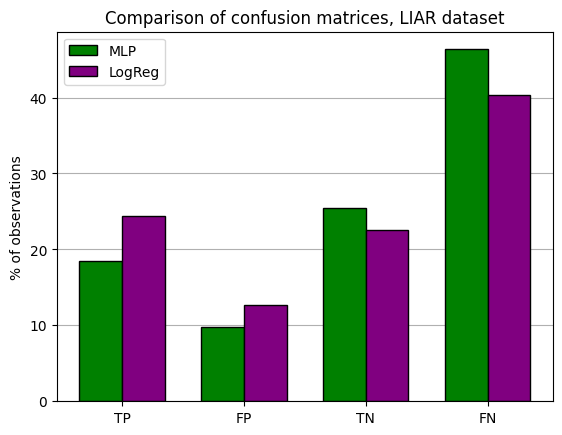

In [35]:
ind = np.arange(len(df_MLP_LIAR['val']))  # the x locations for the groups
w = 0.35


fig_5, ax = plt.subplots()


show_mlp = ax.bar(ind - w/2, df_MLP_LIAR['val'], w, label='MLP',zorder=1,color='green',edgecolor='black')
show_logreg = ax.bar(ind + w/2, df_logreg_LIAR['val'], w, label='LogReg',zorder=1, color='purple',edgecolor='black')
ax.set_axisbelow(True)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.grid(True, axis='y', zorder=0.5)

ax.set_ylabel('% of observations')
ax.set_title('Comparison of confusion matrices, LIAR dataset')
ax.set_xticks(ind)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.legend()

In [22]:
fig_5.savefig('LIAR_CM.png')

# Compare scores from FakeNewsCorpus and LIAR dataset

/var/folders/zn/swxwxbtx3gzbxgntvpx2cv5c0000gn/T/ipykernel_1695/2300371122.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)


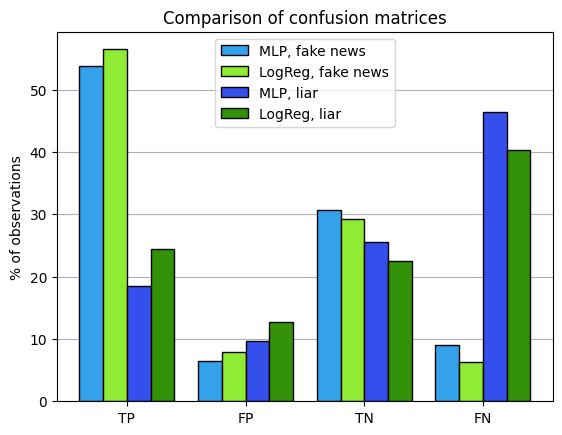

In [36]:
ind = np.arange(len(df_MLP['val']))  # the x locations for the groups
w = 0.2

fig_6, ax = plt.subplots()

show_mlp_fn = ax.bar(ind - 6*w/4, df_MLP['val'], w, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_logreg_fn = ax.bar(ind - w/2, df_LogReg['val'], w, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_mlp_liar = ax.bar(ind + w/2, df_MLP_LIAR['val'], w, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_liar = ax.bar(ind + 6*w/4, df_logreg_LIAR['val'], w, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
ax.set_axisbelow(True)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.grid(True, axis='y', zorder=0.5)

ax.set_ylabel('% of observations')
ax.set_title('Comparison of confusion matrices')
ax.set_xticks(ind)
ax.set_xticklabels(['TP', 'FP', 'TN', 'FN'], rotation=0)
ax.legend()

In [24]:
fig_6.savefig('liar_FN_compare_cm.png')

# Report Dictionaries

In [25]:
df_LR_fn = pd.DataFrame(report_dict_LR_fn)
df_LR_liar = pd.DataFrame(report_dict_LR_liar)
df_MLP_fn = pd.DataFrame(report_dict_MLP_fn)
df_MLP_liar = pd.DataFrame(report_dict_MLP_liar)

df_LR_fn.drop(['support'], axis=0, inplace=True) 
df_LR_liar.drop(['support'], axis=0, inplace=True) 
df_MLP_fn.drop(['support'], axis=0, inplace=True) 
df_MLP_liar.drop(['support'], axis=0, inplace=True) 

print(df_LR_fn)

                  0         1  accuracy  macro avg  weighted avg
precision  0.821229  0.877204  0.857256   0.849217      0.856398
recall     0.787371  0.898600  0.857256   0.842985      0.857256
f1-score   0.803944  0.887773  0.857256   0.845858      0.856614


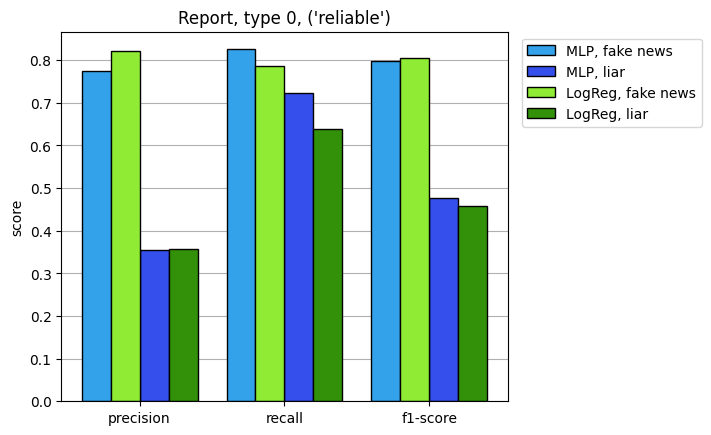

In [26]:
ind = np.arange(len(df_MLP_fn['0']))  # the x locations for the groups
w = 0.2

fig_7, ax = plt.subplots()

show_mlp_fn = ax.bar(ind - 6*w/4, df_MLP_fn['0'], w, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_mlp_liar = ax.bar(ind + w/2, df_MLP_liar['0'], w, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_fn = ax.bar(ind - w/2, df_LR_fn['0'], w, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_logreg_fn = ax.bar(ind + 6*w/4, df_LR_liar['0'], w, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
ax.set_axisbelow(True)

ax.grid(True, axis='y', zorder=0.5)

ax.set_ylabel('score')
ax.set_title('Report, type 0, (\'reliable\')')
ax.set_xticks(ind)
ax.set_xticklabels(['precision', 'recall', 'f1-score'], rotation=0)

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

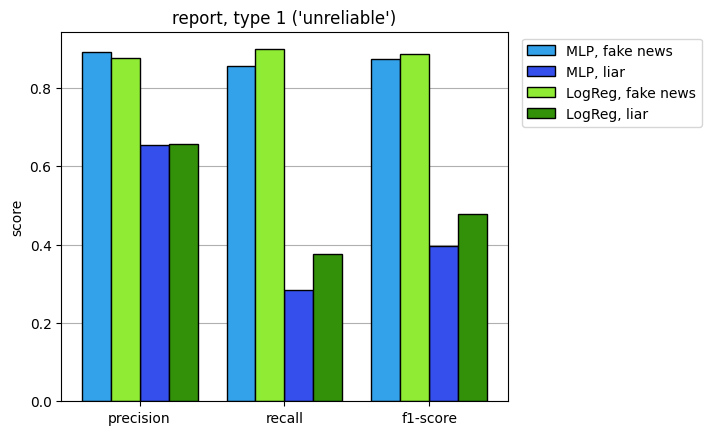

In [27]:
ind = np.arange(len(df_MLP_fn['0']))  # the x locations for the groups
w = 0.2

fig_7, ax = plt.subplots()

show_mlp_fn = ax.bar(ind - 6*w/4, df_MLP_fn['1'], w, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_mlp_liar = ax.bar(ind + w/2, df_MLP_liar['1'], w, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_fn = ax.bar(ind - w/2, df_LR_fn['1'], w, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_logreg_fn = ax.bar(ind + 6*w/4, df_LR_liar['1'], w, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
ax.set_axisbelow(True)

ax.grid(True, axis='y', zorder=0.5)

ax.set_ylabel('score')
ax.set_title('report, type 1 (\'unreliable\')')
ax.set_xticks(ind)
ax.set_xticklabels(['precision', 'recall', 'f1-score'], rotation=0)
#ax.legend()

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

# Showing the results in one bar plot

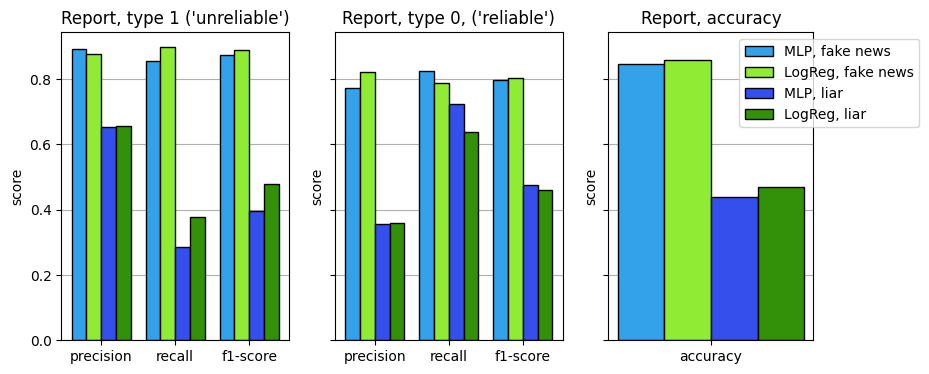

In [28]:
ind = np.arange(len(df_MLP_fn['0']))  # the x locations for the groups
w = 0.2
w2 = 0.1

fig_8, axs = plt.subplots(1,3, figsize=(10, 4), sharey=True)

#Type FAKE
show_mlp_fn = axs[0].bar(ind - 6*w/4, df_MLP_fn['1'], w, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_logreg_fn = axs[0].bar(ind - w/2, df_LR_fn['1'], w, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_mlp_liar = axs[0].bar(ind + w/2, df_MLP_liar['1'], w, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_fn = axs[0].bar(ind + 6*w/4, df_LR_liar['1'], w, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
axs[0].set_axisbelow(True)

axs[0].grid(True, axis='y', zorder=0.5)

axs[0].set_ylabel('score')
axs[0].set_title('Report, type 1 (\'unreliable\')')
axs[0].set_xticks(ind)
axs[0].set_xticklabels(['precision', 'recall', 'f1-score'], rotation=0)

# Type RELIABLE
show_mlp_fn = axs[1].bar(ind - 6*w/4, df_MLP_fn['0'], w, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_logreg_fn = axs[1].bar(ind - w/2, df_LR_fn['0'], w, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_mlp_liar = axs[1].bar(ind + w/2, df_MLP_liar['0'], w, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_fn = axs[1].bar(ind + 6*w/4, df_LR_liar['0'], w, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
axs[1].set_axisbelow(True)

axs[1].grid(True, axis='y', zorder=0.5)

axs[1].set_ylabel('score')
axs[1].set_title('Report, type 0, (\'reliable\')')
axs[1].set_xticks(ind)
axs[1].set_xticklabels(['precision', 'recall', 'f1-score'], rotation=0)
#ax.legend()

# ACCURACY
show_mlp_fn = axs[2].bar(1 - 6*w2/4, df_MLP_fn.at['f1-score','accuracy'], w2, label='MLP, fake news',zorder=1,color='#34a2eb',edgecolor='black')
show_logreg_fn = axs[2].bar(1 - w2/2, df_LR_fn.at['f1-score','accuracy'], w2, label='LogReg, fake news',zorder=1, color='#8feb34',edgecolor='black')
show_mlp_liar = axs[2].bar(1 + w2/2, df_MLP_liar.at['f1-score','accuracy'], w2, label='MLP, liar',zorder=1,color='#344feb',edgecolor='black')
show_logreg_fn = axs[2].bar(1 + 6*w2/4, df_LR_liar.at['f1-score','accuracy'], w2, label='LogReg, liar',zorder=1, color='#329109',edgecolor='black')
axs[2].set_axisbelow(True)

axs[2].grid(True, axis='y', zorder=0.5)

axs[2].set_ylabel('score')
axs[2].set_title('Report, accuracy')
axs[2].set_xticks(np.arange(1,1 + 6*w2/4))
axs[2].set_xticklabels(['accuracy'], rotation=0)


pos = axs[2].get_position()
axs[2].set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
axs[2].legend(loc='upper right', bbox_to_anchor=(1.55, 1))

In [29]:
fig_8.savefig('model_scores_report_fn_liar.png')

In [37]:
df_600K_cleaned['length'] = df_600K_cleaned['content'].apply(lambda x: len(x))
df_LIAR['length'] = df_LIAR['content'].apply(lambda x: len(x))
print(df_LIAR['length'].mean())
print(df_600K_cleaned['length'].mean())

103.03181924790869
3248.3097842916463
